# Chapter 5 - Basis Expansions and Regularization

### Section 5.1 - Basis Expansions and Regularization

* Extremely unlikely the true function $f(X)$ is actually linear in $X$.
* $f(X) = E(Y|X)$ is likely nonlinear and nonadditive in X.
* Representing $f(X)$ as a linear function is often done for convenience.
* In mathematics, a Taylor series is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point. Linear models can be though of as a truncated Taylor approximation of $f(X)$, which of course may have a lot of error.
* To move beyond linearity in $X$, we can add transformations of our inputs to the feature set.  These transformations can be polynomial expansions of $X$, or can take other forms such as log or sinusoidal transformations.
* Inputs can also be broken up into indicator functions on specific ranges.
* Note that the model will still be linear in $\beta$, so we can still apply all the usual linear techniques.
* Polynomial expansion's global nature can cause a functional form in one region to flap about wildly in remote regions.  Thus, piecewise polynomials and splines allow for local representations.
* Wavelet bases can be useful for modeling signals and images.
* Selection methods adaptively scan the dictionary of basis functions to choose those that significantly improve the fit of the model.
* Regularization methods use the entire dictionary of basis functions but restrict the coefficients.

**Example - Taylor Approximations**

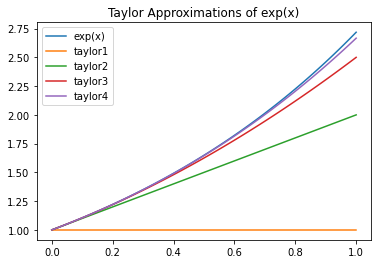

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

x = sp.Symbol('x')
f = sp.exp(x)

def get_taylor_expansion(f, x0, n):
    taylor = 0
    
    for i in range(0, n):
        taylor += (f.diff(x, i).subs(x, x0))/(math.factorial(i))*(x-x0)**i
        
    return taylor

space = np.linspace(0, 1, 100)

plt.plot(space, [f.subs(x, v) for v in space], label=f)
taylor_powers = range(1, 5)
for p in taylor_powers:
    approx = get_taylor_expansion(f, 0, p)
    plt.plot(space, [approx.subs(x, v) for v in space], label='taylor{}'.format(p))
    
plt.title('Taylor Approximations of {}'.format(f))
plt.legend()

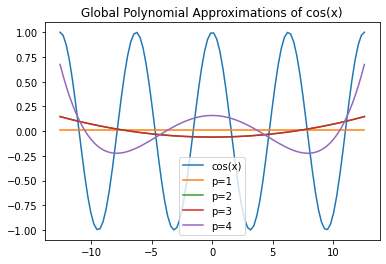

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-4*np.pi, 4*np.pi, 100)
y = np.cos(x)
f_text = 'cos(x)'
plt.plot(x, y, label=f_text)

powers = range(1, 5)
for p in powers:
    coeff = np.polyfit(x, y, p)
    approx = np.poly1d(coeff)(x)
    plt.plot(x, approx, label='p={}'.format(p))
    
plt.title('Global Polynomial Approximations of {}'.format(f_text))
plt.legend()

### Section 5.2 - Piecewise Polynomials and Splines

* Piecewise functions divide your domain into regions and create a different function on each region.
* May be discontinuous or continuous depending on the method. Often we want continuous functions, but sometimes discontinuous polynomials are advantageous in certain applications (e.g. fluid dynamics) because its ability to capture rough perturbed regions. One problem with discontinuous functions is that their derivatives are not globally defined.
* Degree of the polynomial spline is controlled by the basis functions used in the fit.
* In practice (the book doesn't seem to mention this), we should be using orthogonal basis functions for these types of basis expansions.  Otherwise we can end up with poorly conditioned matrices in fitting functions. Further, properties of these orthogonal functions can greatly simplify the calculus required to approximate these functions.  Example of an orthogonal basis would be the Legendre polynomial basis.
* Seldom any reason to go above cubic splines, unless interested in smooth derivatives.
* Splines tend to be more erratic near the boundary knot points. A natural cubic spline implements additional constraints so that the function is linear beyond the boundary knots.

**Example - Splines**

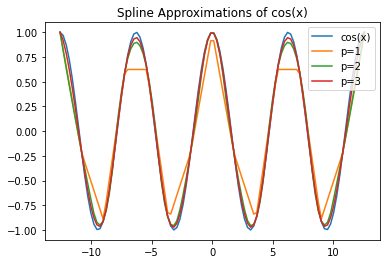

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

x = np.linspace(-4*np.pi, 4*np.pi, 100)
y = np.cos(x)
x_knots = np.linspace(-4*np.pi, 4*np.pi, 15)
y_knots = np.cos(x_knots)
f_text = 'cos(x)'
plt.plot(x, y, label=f_text)

powers = range(1, 4)
for p in powers:
    approx = interp1d(x_knots, y_knots, kind=p)
    plt.plot(x, approx(x), label='p={}'.format(p))
    
plt.title('Spline Approximations of {}'.format(f_text))
plt.legend()

### Section 5.3 - Filtering and Feature Extraction

* Popular approach in signal analysis or image recognition is to transform the raw features into wavelet basis and then use these as inputs into a neural network.

### Section 5.4 - Smoothing Splines

* Avoids the need to select placement and number of knots by using a maximal set of knots.
* Complexity of fit controlled by regularization.
* Fits a function that will minimize the residual sum of squared error, penalized by a curvature complexity function.
* Minimizes the closeness to the data while maintaining a balance with curvature of the fit.
* Sobolev space is a space of functions with sufficiently many derivatives for some application domain, such as partial differential equations, and equipped with a norm that measures both the size and regularity of a function.
* It can be shown that optimal fit for the defined penalized RSS is a natural cubic spline with knots at all unique values of $x_i, i = 1 \dots N$. It seems like this would be over-parameterized but the regularization shrinks the coefficients.
* The penalty coefficient $\lambda$ can be chosen via automatic methods or pre-specified.

**Example - Smoothing Spline**

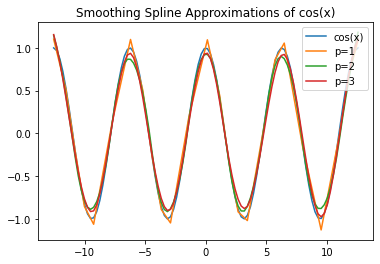

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
%matplotlib inline

x = np.linspace(-4*np.pi, 4*np.pi, 100)
y = np.cos(x)
f_text = 'cos(x)'
plt.plot(x, y, label=f_text)

powers = range(1, 4)
for p in powers:
    approx = UnivariateSpline(x, y, k=p, s=0.50)
    plt.plot(x, approx(x), label='p={}'.format(p))
    
plt.title('Smoothing Spline Approximations of {}'.format(f_text))
plt.legend()

### Section 5.5 - Automatic Selection of the Smoothing Parameters

* For regression splines, smoothing parameters => degree of splines + placement of knots.
* For smoothing splines, smoothing parameter => curvature penalty parameter $\lambda$.
* Parameters can be chosen through combinatorial methods, desired degrees of freeom, optimizing bias-variance tradeoff, and more.

### Section 5.6 - Nonparametric Logistic Regression
* Logistic regression implies $P(Y=1|X=x) = \frac{e^{f(x)}}{1+e^{f(x)}}$.
* Fitting $f(x)$ in a smooth fashion leads to a smooth estimate of the conditional probability.
* If we set up logistic regression and construct a log-likelihood criterion based on log-likelihood of a binomial distribution, it can be shown that the optimal solution $f$ is a smoothing spline function.

### Section 5.7 - Multidimensional Splines

* Methods can be extended to higher dimensions by using a tensor product basis of the one-dimensional basis. This is just the cross product of (2 dimensional example) $[1, x, x^2, ..., x^n]$ and $[1, y, y^2, ..., y^n]$.
* Can be generalized to $d$ dimensions, but in another manifestation of curse of dimensionality, the basis grows exponentially.
* The previously discussed methods for fitting the coefficients generalize to higher dimensions as well.
* Generally it is sufficient to use just a lattice of knots covering the domain.

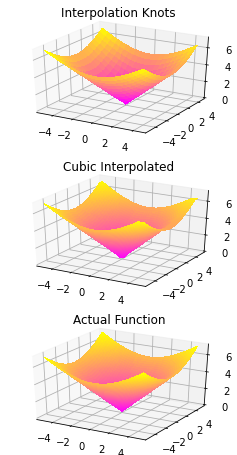

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d
%matplotlib inline

#Interpolate on a not so fine mesh
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
xx, yy = np.meshgrid(x, y)
z = np.sqrt(xx**2 + yy**2)
f = interp2d(x, y, z, kind='cubic')

# Predict on finer mesh
x_new = np.arange(-5, 5, 0.01)
y_new = np.arange(-5, 5, 0.01)
xx_new, yy_new = np.meshgrid(x_new, y_new)
z_new = f(x_new, y_new)
z_real = np.sqrt(xx_new**2 + yy_new**2)

# plot
fig = plt.figure(figsize=plt.figaspect(2))
ax1 = fig.add_subplot(3, 1, 1, projection='3d')
ax2 = fig.add_subplot(3, 1, 2, projection='3d')
ax3 = fig.add_subplot(3, 1, 3, projection='3d')

ax1.set_title('Interpolation Knots')
ax1.plot_surface(xx, yy, z, cmap=cm.spring, linewidth=0, antialiased=False)

ax2.set_title('Cubic Interpolated')
ax2.plot_surface(xx_new, yy_new, z_new, cmap=cm.spring, linewidth=0, antialiased=False)

ax3.set_title('Actual Function')
ax3.plot_surface(xx_new, yy_new, z_real, cmap=cm.spring, linewidth=0, antialiased=False)

### Section 5.8  - Regularization and Reproducing Kernel Hilbert Spaces

* Lots of technical details -- but this section is generalizing the concept of regularization problems in theory. These general forms are defined over infinite dimensional space but with the *kernel property* (from support vector machine literature), the solutions can be reduced to finite dimensional optimization problems.
* Certain kernels can compactly represent high-dimensional inner products/basis expansions.  Think of how the power series of $e^x$ could represent an infinite dimensional polynomial expansion, for example. Also, think of Fourier series expansions being represented in a more compacted form.

### Section 5.9 - Wavelet Smoothing

* Wavelets typically use a complete orthonormal basis to represent functions, but then shrink and select the coefficients towards a sparse representation.
* Very popular in signal processing and compression since they are able to represent both smooth and locally bumpy functions efficiently (time and frequency localization).
* In contrast, Fourier basis allows only frequency localization.
* Fits the coefficients for this basis by least squares, then thresholds (discards, filters) the smaller coefficients.
* Wavelet bases are generated by translations and dilations of the single scaling function $\phi(x)$, known as the father function.
* Wavelets are particularly useful when the data are measured on a uniform lattice, such as discretized signal, image, or a time series.